DatetimeIndex(['1900-01-01 16:31:00', '1900-01-01 16:32:00',
               '1900-01-01 16:33:00', '1900-01-01 16:34:00',
               '1900-01-01 16:35:00', '1900-01-01 16:36:00',
               '1900-01-01 16:37:00', '1900-01-01 16:38:00',
               '1900-01-01 16:39:00', '1900-01-01 16:40:00',
               ...
               '1900-01-01 18:21:00', '1900-01-01 18:22:00',
               '1900-01-01 18:23:00', '1900-01-01 18:24:00',
               '1900-01-01 18:25:00', '1900-01-01 18:26:00',
               '1900-01-01 18:27:00', '1900-01-01 18:28:00',
               '1900-01-01 18:29:00', '1900-01-01 18:30:00'],
              dtype='datetime64[ns]', length=120, freq=None)
Interval 16:31 - 16:46 (North): 56, (South): 79
Interval 16:32 - 16:47 (North): 58, (South): 85
Interval 16:33 - 16:48 (North): 54, (South): 82
Interval 16:34 - 16:49 (North): 53, (South): 84
Interval 16:35 - 16:50 (North): 56, (South): 88
Interval 16:36 - 16:51 (North): 57, (South): 85
Interval 16:37 - 16:5

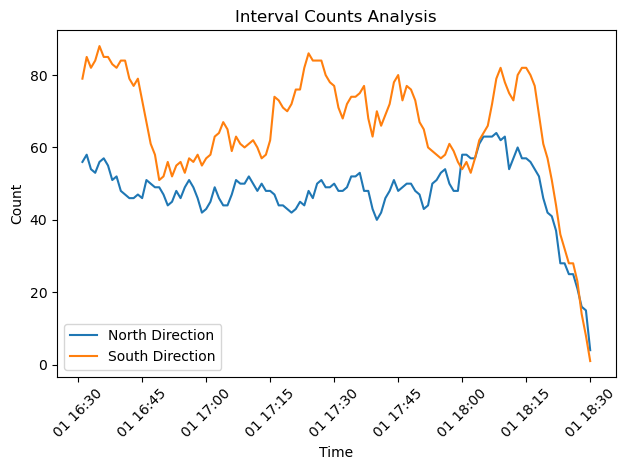

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
file_path = 'time_added_logs/HFR_20240326_182828A_clipped_line2.xlsx'
df = pd.read_excel(file_path)

objects = ['person']
df2 = df[df['ObjectType'].isin(objects)]
df = df2

# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Filter the DataFrame to include only 'North' directions
North_directions = ['North', 'NorthEast', 'NorthWest']
df_north = df[df['Direction'].isin(North_directions)].copy()

# Filter the DataFrame to include only 'South' directions
South_directions = ['SouthEast', 'South', 'SouthWest', 'East', 'West']
df_south = df[df['Direction'].isin(South_directions)].copy()

# Define the time range
start_time = pd.to_datetime('16:30:00', format='%H:%M:%S')
end_time = pd.to_datetime('18:30:00', format='%H:%M:%S')

# Define the interval duration (in minutes)
interval_duration = 15
# Create an empty DatetimeIndex
intervals = pd.DatetimeIndex([])
# Generate intervals within the time range
for i in range(0,interval_duration):
    start_time = start_time + pd.Timedelta(minutes=1)
    interval = pd.date_range(start=start_time, end=end_time, freq=f'{interval_duration}T')
    intervals = intervals.append(interval)
intervals = intervals.sort_values()
print(intervals)

# Calculate interval counts for North direction
north_interval_counts = []
for interval_start in intervals:
    interval_end = interval_start + pd.Timedelta(minutes=interval_duration)
    count = ((df_north['Time'] >= interval_start) & (df_north['Time'] < interval_end)).sum()
    north_interval_counts.append(count)

# Calculate interval counts for South direction
south_interval_counts = []
for interval_start in intervals:
    interval_end = interval_start + pd.Timedelta(minutes=interval_duration)
    count = ((df_south['Time'] >= interval_start) & (df_south['Time'] < interval_end)).sum()
    south_interval_counts.append(count)

df_north_interval_count= pd.DataFrame(columns=['Start_time','End_time', 'Count'])
df_south_interval_count= pd.DataFrame(columns=['Start_time','End_time', 'Count'])

# Print the interval counts
for interval_start, count_north, count_south in zip(intervals, north_interval_counts, south_interval_counts):
    interval_end = interval_start + pd.Timedelta(minutes=interval_duration)
    print(f"Interval {interval_start.strftime('%H:%M')} - {interval_end.strftime('%H:%M')} (North): {count_north}, (South): {count_south}")
    df_north_interval_count.loc[len(df_north_interval_count)] = {'Start_time': interval_start.strftime('%H:%M'),'End_time':interval_end.strftime('%H:%M'), 'Count': count_north}
    df_south_interval_count.loc[len(df_south_interval_count)] = {'Start_time': interval_start.strftime('%H:%M'),'End_time':interval_end.strftime('%H:%M'), 'Count': count_south}

# Plotting (optional)
plt.plot(intervals, north_interval_counts, label='North Direction')
plt.plot(intervals, south_interval_counts, label='South Direction')
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Interval Counts Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [50]:
start_time = pd.to_datetime('16:30:00', format='%H:%M:%S').replace(second=0) + pd.Timedelta(minutes=1)
print(start_time)
start_time = start_time + pd.Timedelta(minutes=1)
print(start_time)

1900-01-01 16:31:00
1900-01-01 16:32:00


In [54]:
df_north_interval_count.to_excel('extra_post_processing/PTA/PTA-line2-NORTH-pointed-shankhamul.xlsx')

In [55]:
df_south_interval_count.to_excel('extra_post_processing/PTA/PTA-line2-SOUTH-pointed-shankhamul.xlsx')